In [1]:
import pandas as pd
import requests
from urllib.parse import urlencode
from datetime import datetime
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import bootstrap
import seaborn as sns
import scipy.stats as ss
from scipy import stats
from tqdm.auto import tqdm
from scipy.stats import norm
import pandahouse as ph

**Проект: вариант 2
Задание 1. A/B–тестирование
1.1 Условие**

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

Скачиваем файлы по ссылкам и предварительно посмотрев файлы, делаем из одного столбца с данными два при чтении файла с помощью sep = ';'


напишем функцию для скачивания данных с яндекс диска


In [102]:
def download (path):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    public_key = input('введите ссылку для скачивания с Яндекс диска:  ')  # Сюда вписываете вашу ссылку

    # Получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']

    if input('использовать sep = ; ? : да/нет') == ('да' or 'lf'): # для удобства добавим "IF" если вдруг не изменили на русскую раскладку
        df = pd.read_csv(download_url,sep = ';')
    else:
        df = pd.read_csv(download_url)
    return df
    

In [5]:
group = download('')

введите ссылку для скачивания с Яндекс диска:  https://disk.yandex.ru/d/UhyYx41rTt3clQ
использовать sep = ; ? : да/нетда


In [89]:
group_add = download('')

введите ссылку для скачивания с Яндекс диска:  https://disk.yandex.ru/d/5Kxrz02m3IBUwQ
использовать sep = ; ? : да/нетlf


In [8]:
active_studs = download('')

введите ссылку для скачивания с Яндекс диска:  https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ
использовать sep = ; ? : да/нетда


In [9]:
checks = download('')

введите ссылку для скачивания с Яндекс диска:  https://disk.yandex.ru/d/pH1q-VqcxXjsVA
использовать sep = ; ? : да/нетнет


Посмотрим визуально на все данные и посмотрим по ним информацию 

In [10]:
#посморим как выглядит наш дф визуально
group.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [11]:
#видим что данные преобразовывать не нужно
group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


кол-во строк               = 74484
кол-во уникальных значений = 74484
все значения по столбцу id уникальны
в данных отсутсвуют пустые значения
число пользователей в контрольной группе_A       =  14671
число пользователей в эксперементальной группе_В =  59813
график распределения погруппам
AxesSubplot(0.125,0.125;0.775x0.755)


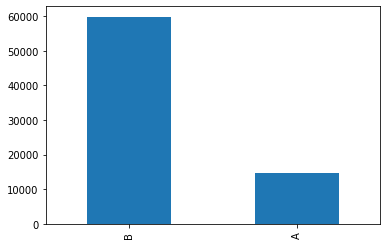

In [12]:
print("кол-во строк               =", group.shape[0])
print("кол-во уникальных значений =", group.id.nunique())
if group.shape[0] == group.id.nunique():
     print("все значения по столбцу id уникальны")
else:
        print("Ошибка: надо докрутить данные")
if np.any(group.isna().values) == False:
    print("в данных отсутсвуют пустые значения")
else:
    print("Ошибка: надо докрутить данные")
print("число пользователей в контрольной группе_A       = ", group.query('grp=="A"')['grp'].count())
print("число пользователей в эксперементальной группе_В = ", group.query('grp=="B"')['grp'].count())
x= group.grp.value_counts()
print("график распределения погруппам")
print(x.plot.bar())

In [104]:
group_add.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [105]:
group_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


кол-во строк               = 92
кол-во уникальных значений = 92
все значения по столбцу id уникальны
в данных отсутсвуют пустые значения
число пользователей в контрольной группе_A       =  22
число пользователей в эксперементальной группе_В =  70
график распределения погруппам
AxesSubplot(0.125,0.125;0.775x0.755)


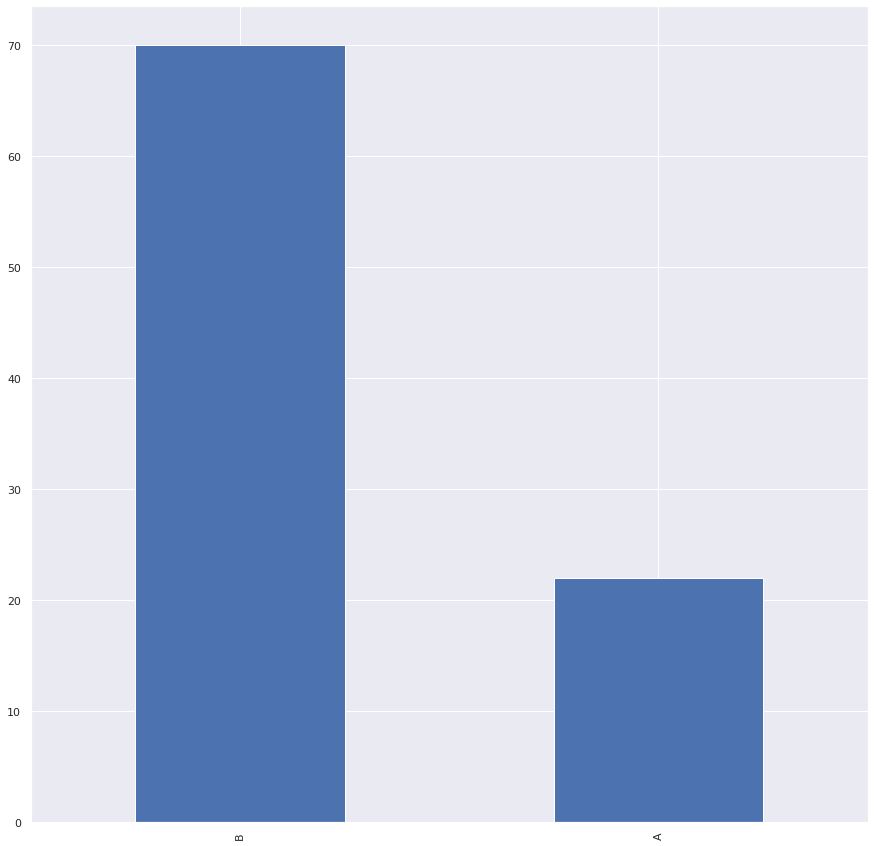

In [107]:
print("кол-во строк               =", group_add.shape[0])
print("кол-во уникальных значений =", group_add.id.nunique())
if group_add.shape[0] == group_add.id.nunique():
     print("все значения по столбцу id уникальны")
else:
        print("Ошибка: надо докрутить данные")
if np.any(group_add.isna().values) == False:
    print("в данных отсутсвуют пустые значения")
else:
    print("Ошибка: надо докрутить данные")
print("число пользователей в контрольной группе_A       = ", group_add.query('grp=="A"')['grp'].count())
print("число пользователей в эксперементальной группе_В = ", group_add.query('grp=="B"')['grp'].count())
x= group_add.grp.value_counts()
print("график распределения погруппам")
print(x.plot.bar())

In [108]:
active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [32]:
active_studs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


In [33]:
print("кол-во строк               =", active_studs.shape[0])
print("кол-во уникальных значений =", active_studs.student_id.nunique())
if active_studs.shape[0] == active_studs.student_id.nunique():
     print("все значения по столбцу id уникальны")
else:
        print("Ошибка: надо докрутить данные")
if np.any(active_studs.isna().values) == False:
    print("в данных отсутсвуют пустые значения")
else:
    print("Ошибка: надо докрутить данные")

кол-во строк               = 8341
кол-во уникальных значений = 8341
все значения по столбцу id уникальны
в данных отсутсвуют пустые значения


In [34]:
checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [35]:
checks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


кол-во строк               = 541
кол-во уникальных значений = 541
все значения по столбцу id уникальны
в данных отсутсвуют пустые значения
построим график распределения по колонке rev


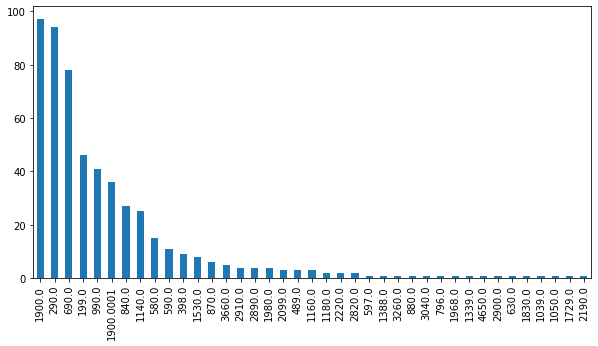

In [36]:
print("кол-во строк               =", checks.shape[0])
print("кол-во уникальных значений =", checks.student_id.nunique())
if checks.shape[0] == checks.student_id.nunique():
     print("все значения по столбцу id уникальны")
else:
        print("Ошибка: надо докрутить данные")
if np.any(checks.isna().values) == False:
    print("в данных отсутсвуют пустые значения")
else:
    print("Ошибка: надо докрутить данные")
x1 = checks.rev.value_counts()
print("построим график распределения по колонке rev")
plt.figure(figsize=(10, 5))
x1.plot.bar()


проверим на баги, например есть ли пользователи которые оплатили, но являются неактивными пользователями

In [37]:
group_activ=group.copy() #сделаем копию, чтобы не вносить изменения в данный дф
group_activ['activ_id']=group_activ['id'].apply(lambda x: 1 if x in active_studs['student_id'].values else 0) #добавим колонку с флажками 1 и о с помощью лямбды активный/не активный пользователь

In [38]:
checks = checks.rename(columns={'student_id':'id'}) #переименуем колонку для дальнейшего merge

In [39]:
group_activ = group_activ.merge(checks, on='id', how='outer') # используем outer, так как он заполнит пропущенные значения NaN, если нет совпадения по ключу.

In [40]:
group_activ.head() # посмотри визуально на нашу таблицу

,id,grp,activ_id,rev
0,1489,B,0.0,NaN
1,1627,A,1.0,990.0
2,1768,B,0.0,NaN
3,1783,B,0.0,NaN
4,1794,A,0.0,NaN


In [41]:
group_activ.query('activ_id==0').rev.count() #считаем сколько у нас пользователей, которые совершили покупку, но не заходили во время дней теста

149


Из полученных данных, можно сделать предположение: возможно что это автоматические подписки, которые оплачиваются автоматом у пользователя, либо была задержка по оплате. Точная механики нам неизвестна. НО данных пользователей мы учитывать для a/b тестов не будемБ так как нам нужны только активные для стат значимых результатов.
    
**ПОЭТОМУ ВОЗВРЩАЕМСЯ В РАННЕМУ РЕШЕНИЮ ЗАДАЧИ**


Следующим этапом мы должны собрать данные, востроить гипотезы, выбрать тесты и сделать статистические выводы.

При сборке данных будем пользоваться тремя дф (group, active_studs, checks). На данном этапе мы не будем брать дф groups_add, так как файл прислали после двух дней других(его рассмотрим чуть позже)

In [42]:
#создадим из данного файла список, чтобы потом к нему обратиться и найти в файле group, только тех юзеров, которые заходили во время теста
student_id = active_studs.student_id.to_list()

In [43]:
#обращаемся к нашему созданному листу и перезаписываем в новую переменную, делал merge, данные получились такими же(этот метод выглядит поприятней)
active_group = group.query('id in @student_id')
active_group.head()

,id,grp
1,1627,A
10,2085,B
12,2215,B
43,3391,A
45,3401,B


In [44]:
#теперь с помощью merge добавим колонку rev по юзерам, но для начала переименуем колонку в файле checks
checks = checks.rename(columns={'student_id':'id'})

In [45]:
#ПОЖЕНИЛИ-отсылочка к Беслану
active_group = active_group.merge(checks, on='id', how='left')
active_group.head()
#видим,что в данных есть пустые значеия, скорее всего это связано с тем что пользователи заходили, но не производили оплат. 
#удалять данные с пустыми значениями нельзя, так как это может повлиять на наши выводы. 
#поэтому преобразуем NaN в 0.

,id,grp,rev
0,1627,A,990.0
1,2085,B,NaN
2,2215,B,NaN
3,3391,A,NaN
4,3401,B,NaN


In [46]:
#используем fillna и преобразуем пустые значения в NaN
active_group['rev']=active_group.rev.fillna(0)

In [47]:
active_group.head()

,id,grp,rev
0,1627,A,990.0
1,2085,B,0.0
2,2215,B,0.0
3,3391,A,0.0
4,3401,B,0.0


In [48]:
#проверим собранные данные на дупликаты
active_group.id.count()==active_group.id.nunique()

True

In [49]:
#отбереем юзеров из группы А
active_group_a = active_group.query('grp == "A"')
active_group_a.head()

,id,grp,rev
0,1627,A,990.0
3,3391,A,0.0
13,109623,A,0.0
15,133678,A,0.0
23,175944,A,0.0


In [50]:
#отбереем юзеров из группы B
active_group_b = active_group.query('grp == "B"')
active_group_b.head()

,id,grp,rev
1,2085,B,0.0
2,2215,B,0.0
4,3401,B,0.0
5,22994,B,0.0
6,26899,B,0.0


In [51]:
#используем для получения описательной статистики для данных в группе A
active_group_a.rev.describe()

count    1535.000000
mean       47.439739
std       290.766992
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3660.000000
Name: rev, dtype: float64

In [52]:
#используем для получения описательной статистики для данных в группе В
active_group_b.rev.describe()

count    6793.000000
mean       57.864567
std       313.197487
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      4650.000000
Name: rev, dtype: float64

Исходя из полученных данных мы видим, что в данных по группам есть значения по колонке rev с нулями. Посчитаем какой процент в каждой группе составляют нулевые значения.

In [53]:
print('процентное содерержание 0 в группе A =', round(active_group_a.query('rev == 0').id.count()/active_group_a.id.count() * 100, 2))
print('процентное содерержание 0 в группе A =', round(active_group_b.query('rev == 0').id.count()/active_group_b.id.count() * 100, 2))

процентное содерержание 0 в группе A = 94.92
процентное содерержание 0 в группе A = 95.39


Поссмотрим на размеры групп, средний чек и конверсию в наших данных. 

Пропишем функию, которая вернет 1, если пользователь совершил покупку, иначе 0

In [54]:
#наша функция
def active_user(x):
    if x > 0:
        return 1
    else:
        return 0

In [55]:
#создаем колонку
active_group['active_id'] = active_group.rev.apply(active_user)

In [56]:
active_group.head()

,id,grp,rev,active_id
0,1627,A,990.0,1
1,2085,B,0.0,0
2,2215,B,0.0,0
3,3391,A,0.0,0
4,3401,B,0.0,0


In [57]:
#посчитаем конверсию и создадим дополнительную колонку
con_group = active_group.groupby(['grp'], as_index=False)\
    .agg({'rev':'mean','active_id':'sum', 'id':'count'})\
    .rename(columns={'rev':'avg_rev', 'active_id':'count_active','id':'count_id'})
con_group['conversion']=con_group.count_active/con_group.count_id*100

In [58]:
con_group.head()

,grp,avg_rev,count_active,count_id,conversion
0,A,47.439739,78,1535,5.081433
1,B,57.864567,313,6793,4.607684


In [59]:
#сделаем дф, где будут данные с нулевыми значениями по группе А
group_a = active_group.query('grp == "A"')

In [60]:
#сделаем дф, где будут данные ,tp нулевых значений по группе А
group_a_nozero = active_group.query('grp == "A" and rev>0')

In [61]:
#сделаем дф, где будут данные с нулевыми значениями по группе B
group_b = active_group.query('grp == "B"')

In [62]:
#сделаем дф, где будут данные ,без нулевых значений по группе B
group_b_nozero = active_group.query('grp == "B" and rev>0')

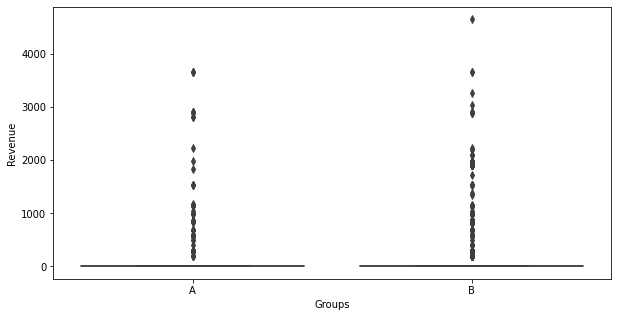

In [63]:
#построим график распределния по группам по всем пользователям с нулевыми значениями в rev
plt.figure(figsize=(10,5))
sns.boxplot(x='grp', y='rev', data=active_group)
plt.xlabel('Groups')
plt.ylabel('Revenue')
plt.show()

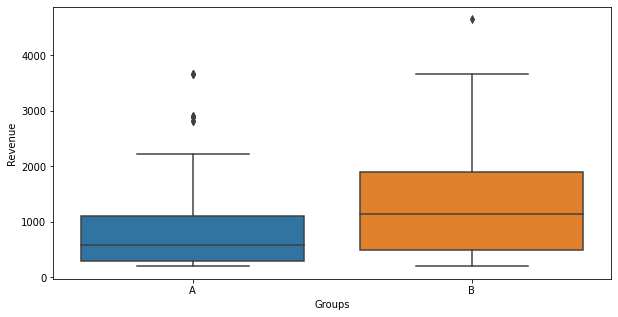

In [64]:
#построим график распределния по группам по всем пользователям без нулевых значений в rev
plt.figure(figsize=(10,5))
sns.boxplot(x='grp', y='rev', data=active_group.query('rev>0'))
plt.xlabel('Groups')
plt.ylabel('Revenue')
plt.show()

Исходя из графиков, вдно, что есть значительные выбросы и можно предположить, что распределение будет ненормальным. И воспользоваться t-тестом не уместно. Но проведем еще пару анализов.

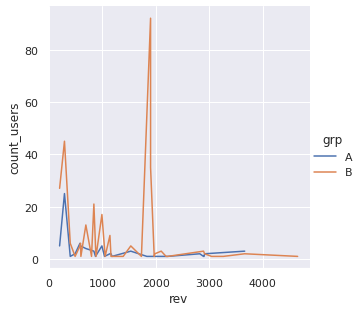

In [65]:
df_gist = active_group.query('rev > 0').groupby(['rev','grp'], as_index=False).id.count().rename(columns={'id': 'count_users'})
sns.set(rc={'figure.figsize':(15,15)})
sns.relplot(
    data=df_gist, kind="line",
    x="rev", y="count_users",
    hue="grp", height=4.27)

Из графиков выше, видно увеличение покупок чуть меньше 2000 и всплеск около 1000, что скорее всего и привело к возможному увеличению среднего в группе В. 

Так же можно заметить еще одно подтверждение того, что распрделение ненормальное.
Проведем тесты на нормальность и закрепим наше утверждение.

In [66]:
#у двух выборо p-valeu=0, следовательно распределения ненормальные (где rev с нулевыми значениями)
print(ss.normaltest(group_a.rev))
print(ss.normaltest(group_b.rev))

NormaltestResult(statistic=2235.0038926868115, pvalue=0.0)
NormaltestResult(statistic=7799.5839920248845, pvalue=0.0)


In [67]:
#у двух выборо p-valeu<0,05, следовательно распределения ненормальные (где rev без нулевых значений)
print(ss.normaltest(group_a_nozero.rev))
print(ss.normaltest(group_b_nozero.rev))

NormaltestResult(statistic=30.378419638487475, pvalue=2.5316868804220266e-07)
NormaltestResult(statistic=7.022269699078301, pvalue=0.029863005181946005)


In [68]:
# Проверяю различия в дисперсиях
# Pvalue < 0.05. Принимаю гипотезу о различии дисперсий у групп с нулевыми значениями
print('С нулевыми значениями. p-value =', ss.levene(group_a.rev, group_b.rev, center='mean')[1])
# Pvalue > 0.05. Не могу принять гипотезу о различии дисперсий у групп без нулевых значений
print('Без нулевых значений. p-value =', ss.levene(group_a_nozero.rev, group_b_nozero.rev, center='mean')[1])

С нулевыми значениями. p-value = 0.013129800854584504
Без нулевых значений. p-value = 0.5524868375224445



Сделаем выводы по собранным данным с нулевыми значениями rev:
1 Обе выборки ненормального распределения
2 Дисперсии отличаются
3 Имеются явные выбросы, что показано на графиках
4 В группах большую часть составляют нулевые значения

Выводы по собранным данным без нулевых значений rev:
1 Обе выборки так же ненормального распределения
2 Дисперсии стат. значимо не различаются
3 Имеются явные выбросы, что показано на графиках

Опираясь наполученные данные можем выбрать нужный нам тест. Им станет bootstrap. U критерий не будем брать, так как результаты теста Манна Уитни сложно интерпретировать.

In [69]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 10000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
#     _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
#     for bar in bars:
#         if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
#             bar.set_facecolor('red')
#         else: 
#             bar.set_facecolor('grey')
#             bar.set_edgecolor('black')
    
#     plt.style.use('ggplot')
#     plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
#     plt.xlabel('boot_data')
#     plt.ylabel('frequency')
#     plt.title("Histogram of boot_data")
#     plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

bootstrap СR - конверсия в покупку

**гипотезы:**

H0 - CR в двух группах не изменился

H1 - CR в двух группах изменился

In [70]:
#bootstrap для группы с нулевыми значенями
#принимаем нулевую гипотезу, так как p-value значительно > 0,05
booted_data = get_bootstrap(group_a['rev'], group_b['rev']) 
booted_data["p_value"]

0.34597371988427617

Посмотрим еще на один показатель ARPPU - cредний доход с платящего пользователя.

**гипотизы:**

H0 - ARPPU в двух групах не изменилось

H1 - ARPPU в двух групах изменилось

In [111]:
#bootstrap для ARPPU
#принимаем альтернативную гипотезу так как, p-value < 0,05
booted_data = get_bootstrap(group_a_nozero['rev'], group_b_nozero['rev']) 
booted_data["p_value"]

0.01833785902864769

Вывод: исходя из результатов теста делаем вывод. Если мы не хотим рисковать то принимаем нулевую гипотезу, так как bootstrap показал что различий  CR статистически нет в группах с нулевыми значениями. Но альтернативной гипотезе тоже есть место. Наше решение, что можно запустить новую механику на пользователей, но нужно будет мониторить показатели метрик.



**Задание 3. Python
3.1 Задача**

Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.
Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [50]:
group_add.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [51]:
#Чтобы активировать функцию нужен следующий формат "oppen ('',df_original)"
# где '' - ссылка с яндекс диска
# готовый дф - active_group
def oppen (path, df_original):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    public_key = input('')  # Сюда вписываете вашу ссылку

    # Получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    path = response.json()['href']

    group_add = pd.read_csv(path)
    group_add1 = group_add.merge(checks, how='left')#добавляем информацию о покупках из дф checks в дополнительный файл
    group_add1['rev']=group_add1.rev.fillna(0)#ставимнули в пустые значения
    group_add1['active_id']=group_add1.rev.apply(lambda rev: 1 if rev>0 else 0)#с помощью лямбды ставим флажки в виде 1 активным пользоватлям
    df_2=df_original.copy()#делаем копию оригинального дф
    df_2=df_2.merge(group_add1, how='outer')#добавляем к оригиналу дополнительный файл
    #расчитываем метрики для оригинального дф
    df_original = df_original.groupby('grp', as_index=False)\
            .agg({'rev': 'mean', 'active_id': 'sum', 'id': 'count'})\
            .rename(columns={'rev': 'avg_revenue', 'active_id': 'count_active', 'id': 'count_users'})
    df_original['conversion'] = df_original.count_active / df_original.count_users
#     Теперь метрики для измененного df
    df_2 = df_2.groupby('grp', as_index=False)\
        .agg({'rev': 'mean', 'active_id': 'sum', 'id': 'count'})\
        .rename(columns={'rev': 'avg_revenue', 'active_id': 'count_active', 'id': 'count_users'})
    df_2['conversion'] = df_2.count_active / df_2.count_users
    print('\t\t  Исходные метрики')
    print(df_original)
    print()
    print('\t     Метрики поcле обновления данных')
    print(df_2)
    return df_2.head()

In [52]:
def visualization (visualization_oppen):
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(wspace=0.5)
    plt.subplot(2, 2, 1)
    sns.barplot(x='grp', y='count_active', data=visualization_oppen)
    plt.title('кол-во активных пользователей')
    plt.subplot(2, 2, 2)
    sns.barplot(x='grp', y='count_users', data=visualization_oppen)
    plt.title('кол-во всех пользвателей пользователей')
    plt.subplot(2, 2, 3)
    sns.barplot(x='grp', y='avg_revenue', data=visualization_oppen)
    plt.title('средний чек по группам')
    plt.subplot(2, 2, 4)
    sns.barplot(x='grp', y='conversion', data=visualization_oppen)
    plt.title('конверсия по группам')
    plt.show()

In [53]:
print('Для подгрузки даных и перерасчет метрик введите ссылку на яндекс диск, где расположен дополнительный файл')
oppen('',active_group)

Для подгрузки даных и перерасчет метрик введите ссылку на яндекс диск, где расположен дополнительный файл
https://disk.yandex.ru/d/5Kxrz02m3IBUwQ
		  Исходные метрики
  grp  avg_revenue  count_active  count_users  conversion
0   A    47.439739            78         1535    0.050814
1   B    57.864567           313         6793    0.046077

	     Метрики поcле обновления данных
  grp  avg_revenue  count_active  count_users  conversion
0   A    46.769428            78         1557    0.050096
1   B    57.551217           314         6863    0.045753


,grp,avg_revenue,count_active,count_users,conversion
0,A,46.769428,78,1557,0.050096
1,B,57.551217,314,6863,0.045753


In [54]:
print('чтобы вызвать функцию постройки графиков, введите ссылку яндекс диска на дополнительный файл')
visualization_oppen = oppen('',active_group)

чтобы вызвать функцию постройки графиков, введите ссылку яндекс диска на дополнительный файл
https://disk.yandex.ru/d/5Kxrz02m3IBUwQ
		  Исходные метрики
  grp  avg_revenue  count_active  count_users  conversion
0   A    47.439739            78         1535    0.050814
1   B    57.864567           313         6793    0.046077

	     Метрики поcле обновления данных
  grp  avg_revenue  count_active  count_users  conversion
0   A    46.769428            78         1557    0.050096
1   B    57.551217           314         6863    0.045753


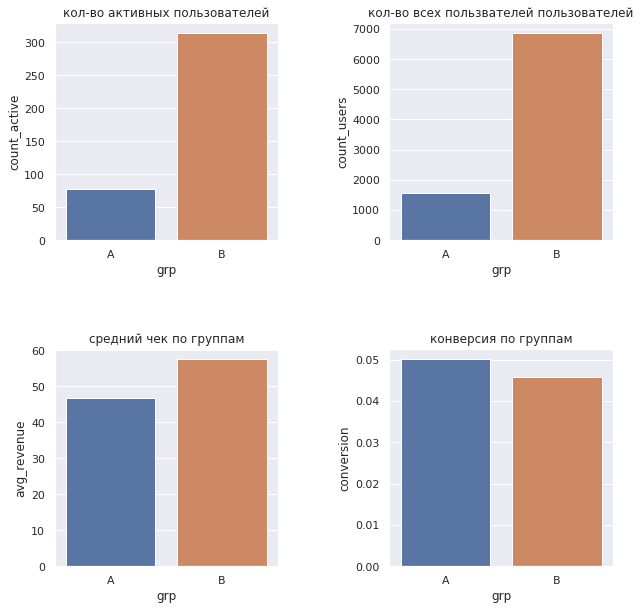

In [60]:
visualization(visualization_oppen)